In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#imports csv file
champs = pd.read_csv('Worlds 2024 Champions Data.csv')
champs.head()

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,GT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15
0,Aurora,14,60,96%,9.0,5.0,64%,5.6,3.5,33:36:00,7.6,684.0,394.0,-2.6,-7.0,-94.0
1,Yone,28,45,95%,18.0,10.0,64%,4.3,3.4,32:14:00,9.5,645.0,442.0,5.4,303.0,265.0
2,Skarner,32,35,87%,23.0,9.0,72%,5.7,3.9,32:02:00,5.9,346.0,338.0,-0.8,11.0,82.0
3,Jax,35,28,82%,19.0,16.0,54%,3,5.2,34:25:00,8.0,440.0,402.0,-5.1,38.0,-164.0
4,Ashe,18,43,79%,13.0,5.0,72%,6.2,6.1,33:30:00,9.5,553.0,444.0,-2.8,-156.0,17.0


In [ ]:
champs.head(10)

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,GT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15
0,Aurora,14,60,96%,9.0,5.0,64%,5.6,3.5,33:36:00,7.6,684.0,394.0,-2.6,-7.0,-94.0
1,Yone,28,45,95%,18.0,10.0,64%,4.3,3.4,32:14:00,9.5,645.0,442.0,5.4,303.0,265.0
2,Skarner,32,35,87%,23.0,9.0,72%,5.7,3.9,32:02:00,5.9,346.0,338.0,-0.8,11.0,82.0
3,Jax,35,28,82%,19.0,16.0,54%,3,5.2,34:25:00,8.0,440.0,402.0,-5.1,38.0,-164.0
4,Ashe,18,43,79%,13.0,5.0,72%,6.2,6.1,33:30:00,9.5,553.0,444.0,-2.8,-156.0,17.0
5,Rell,42,16,75%,20.0,22.0,48%,2.6,8.7,33:53:00,1.1,130.0,243.0,0.0,-53.0,-114.0
6,Kalista,17,39,73%,10.0,7.0,59%,4.2,5.1,34:51:00,9.2,554.0,438.0,-5.4,-195.0,-385.0
7,Kaisa,29,26,71%,16.0,13.0,55%,5.7,7.9,32:52:00,10.0,742.0,467.0,-4.6,-274.0,-132.0
8,Gnar,30,20,65%,19.0,11.0,63%,3.3,4.6,32:45:00,8.1,509.0,407.0,-0.5,-167.0,-190.0
9,Ziggs,9,36,58%,4.0,5.0,44%,4.7,4.7,31:14:00,9.8,728.0,431.0,5.6,87.0,480.0


In [ ]:
#fills missing values with 0
champs.fillna(0, inplace = True)

In [ ]:
champs

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,GT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15
0,Aurora,14,60,96%,9.0,5.0,64%,5.6,3.5,33:36:00,7.6,684.0,394.0,-2.6,-7.0,-94.0
1,Yone,28,45,95%,18.0,10.0,64%,4.3,3.4,32:14:00,9.5,645.0,442.0,5.4,303.0,265.0
2,Skarner,32,35,87%,23.0,9.0,72%,5.7,3.9,32:02:00,5.9,346.0,338.0,-0.8,11.0,82.0
3,Jax,35,28,82%,19.0,16.0,54%,3,5.2,34:25:00,8.0,440.0,402.0,-5.1,38.0,-164.0
4,Ashe,18,43,79%,13.0,5.0,72%,6.2,6.1,33:30:00,9.5,553.0,444.0,-2.8,-156.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Belveth,0,0,0%,0.0,0.0,0,0,-,0,0.0,0.0,0.0,0.0,0.0,0.0
164,Nilah,0,0,0%,0.0,0.0,0,0,-,0,0.0,0.0,0.0,0.0,0.0,0.0
165,Milio,0,0,0%,0.0,0.0,0,0,-,0,0.0,0.0,0.0,0.0,0.0,0.0
166,Naafiri,0,0,0%,0.0,0.0,0,0,-,0,0.0,0.0,0.0,0.0,0.0,0.0


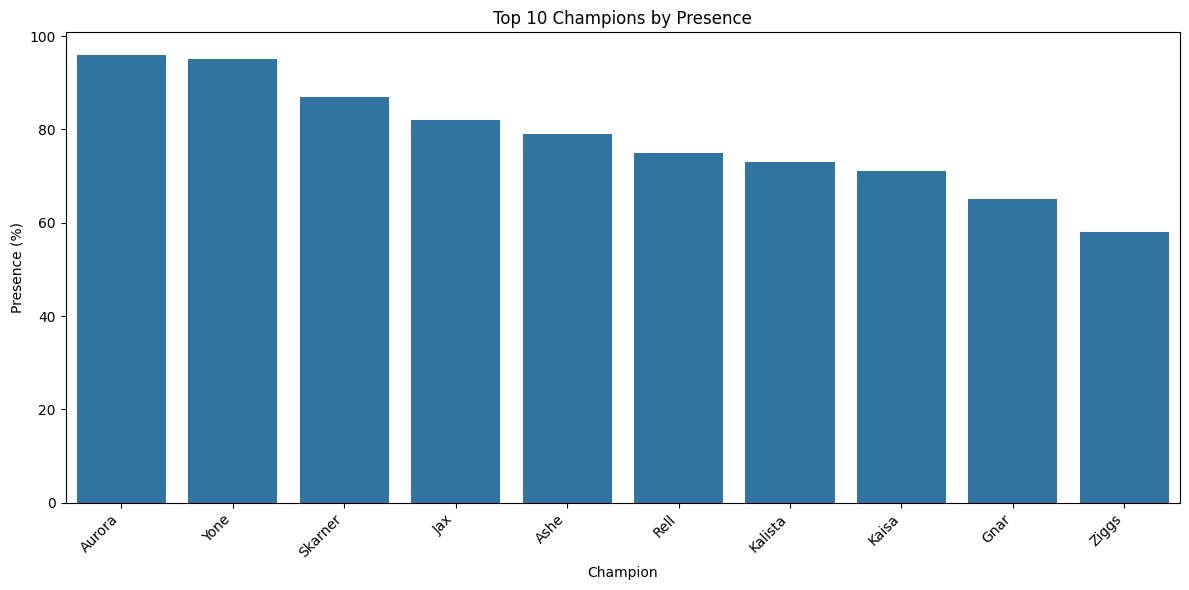

In [ ]:
#converts the presence column to strings, removes the % signs, then converts the values to floats
champs['Presence'] = champs['Presence'].astype(str).str.rstrip('%').astype(float)
#takes the top 10 values in the presence column and resets the index to assign the new values accordingly
top_picks = champs.sort_values(by="Presence", ascending=False).reset_index().head(10)

#makes a barplot of the top 10 champions by presence
plt.figure(figsize=(12, 6))
sns.barplot(x="Champion", y="Presence", data=top_picks)
plt.title("Top 10 Champions by Presence")
plt.xlabel("Champion")
plt.ylabel("Presence (%)")
#rotates the x values for better readibility
plt.xticks(rotation=45, ha='right')


plt.tight_layout()

plt.show()

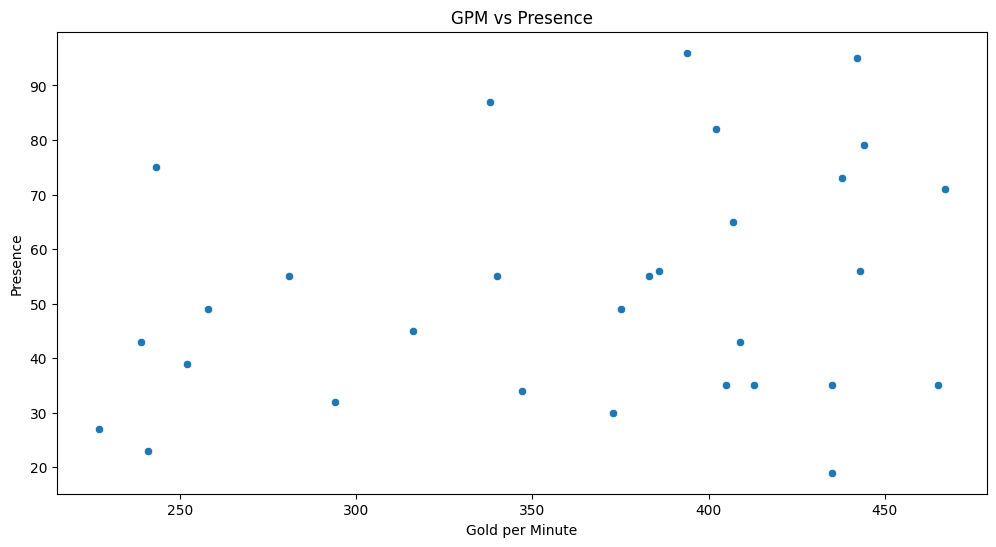

In [ ]:
#takes champions with at least 10 games and makes a scatterplot of GPM vs Presence
plt.figure(figsize=(12, 6))
play = champs[champs['Picks'] >= 10]
sns.scatterplot(data = play, x = 'GPM', y = 'Presence')
plt.title('GPM vs Presence')
plt.xlabel('Gold per Minute')
plt.ylabel('Presence')
plt.show()

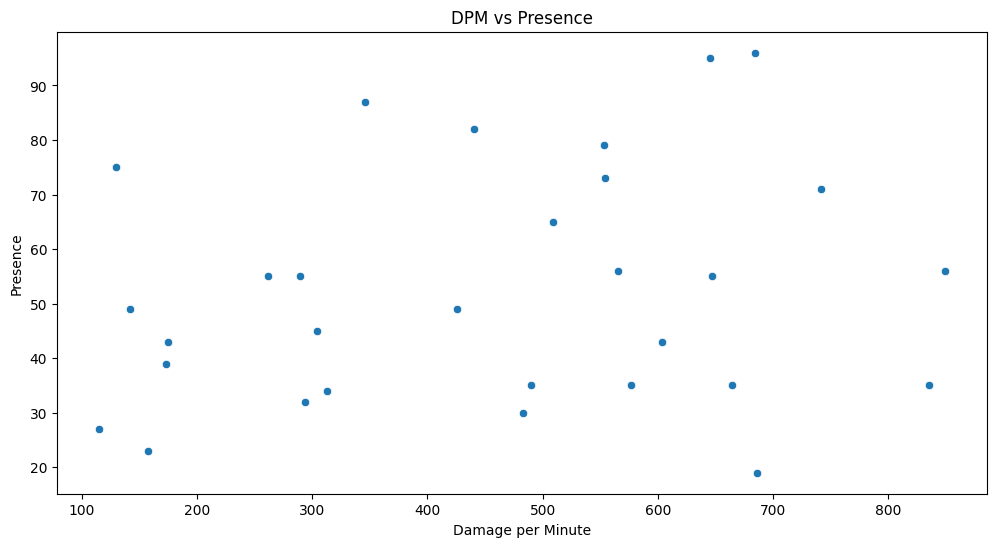

In [ ]:
#takes champions with at least 10 games and makes a scatterplot of DPM vs Presence
plt.figure(figsize=(12, 6))
play = champs[champs['Picks'] >= 10]
sns.scatterplot(data = play, x = 'DPM', y = 'Presence')
plt.title('DPM vs Presence')
plt.xlabel('Damage per Minute')
plt.ylabel('Presence')
plt.show()

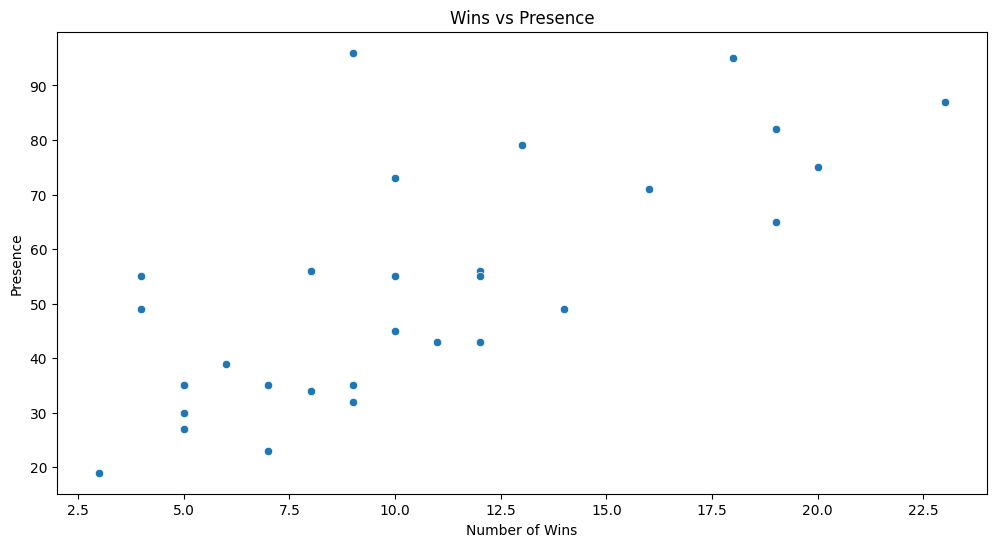

In [22]:
#takes champions with at least 10 games and makes a scatterplot of Wins vs Presence
plt.figure(figsize=(12, 6))
play = champs[champs['Picks'] >= 10]
sns.scatterplot(data = play, x = 'Wins', y = 'Presence')
plt.title('Wins vs Presence')
plt.xlabel('Number of Wins')
plt.ylabel('Presence')
plt.show()

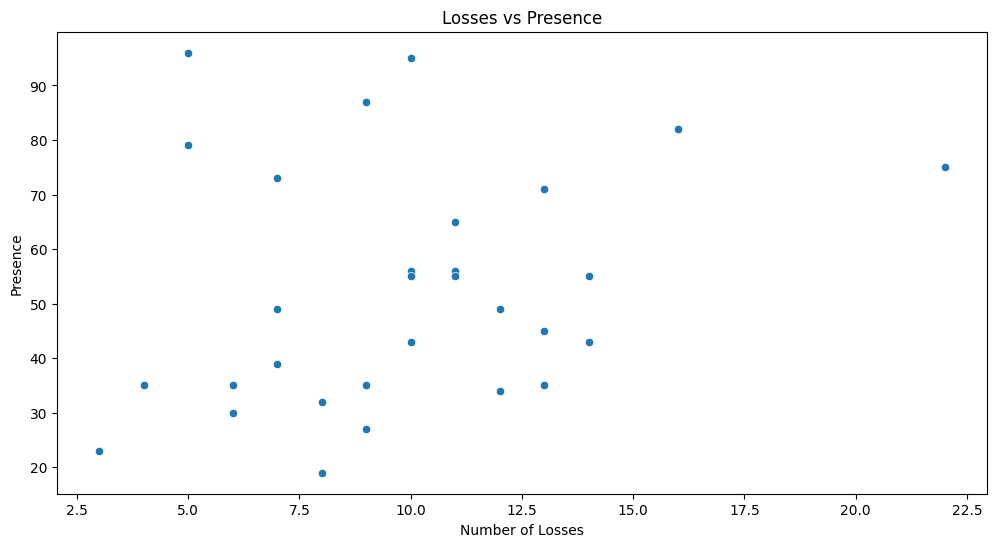

In [23]:
#takes champions with at least 10 games and makes a scatterplot of Losses vs Presence
plt.figure(figsize=(12, 6))
play = champs[champs['Picks'] >= 10]
sns.scatterplot(data = play, x = 'Losses', y = 'Presence')
plt.title('Losses vs Presence')
plt.xlabel('Number of Losses')
plt.ylabel('Presence')
plt.show()

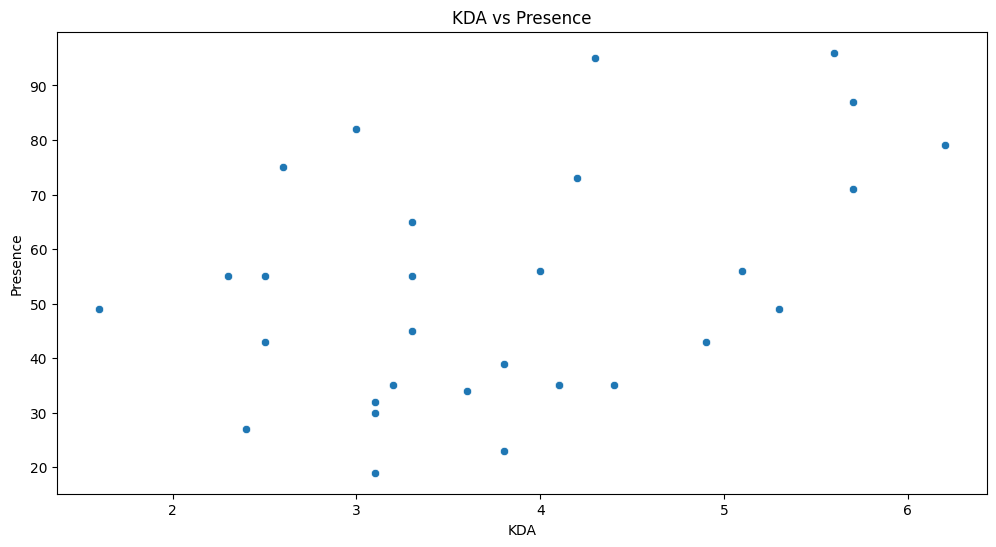

In [24]:
#takes champions with at least 10 games and makes a scatterplot of KDA vs Presence
plt.figure(figsize=(12, 6))
play = champs[champs['Picks'] >= 10]
champs['KDA'] = pd.to_numeric(champs['KDA'], errors='coerce')
top_kills = play.sort_values(by='KDA', ascending=False)
sns.scatterplot(data = top_kills, x = 'KDA', y = 'Presence')
plt.title('KDA vs Presence')
plt.xlabel('KDA')
plt.ylabel('Presence')
plt.show()

<ipython-input-12-f3edc165c8b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  play['Avg BT'] = pd.to_numeric(play['Avg BT'], errors='coerce')
<ipython-input-12-f3edc165c8b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  play['Avg BT'] = play['Avg BT'].fillna(0)
<ipython-input-12-f3edc165c8b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

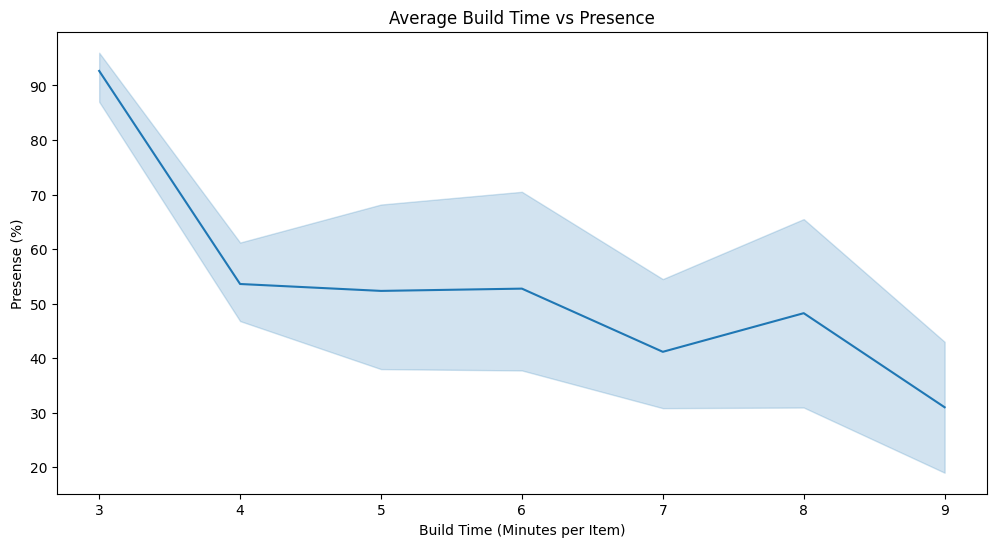

In [ ]:
#creates a lineplot of Average Build Time vs Presense using data from champions picked at least 10 times
plt.figure(figsize=(12, 6))
play = champs[champs['Picks'] >= 10]
#converts Avg BT to numbers, ignores numbers that create errors
play['Avg BT'] = pd.to_numeric(play['Avg BT'], errors='coerce')
#fills empty values in Avg BT with 0
play['Avg BT'] = play['Avg BT'].fillna(0)
#converts the new values to integers
play['Avg BT'] = play['Avg BT'].astype(int)
sns.lineplot(data = play, x = 'Avg BT', y = 'Presence')
plt.title('Average Build Time vs Presence')
plt.xlabel('Build Time (Minutes per Item)')
plt.ylabel('Presense (%)')
plt.show()

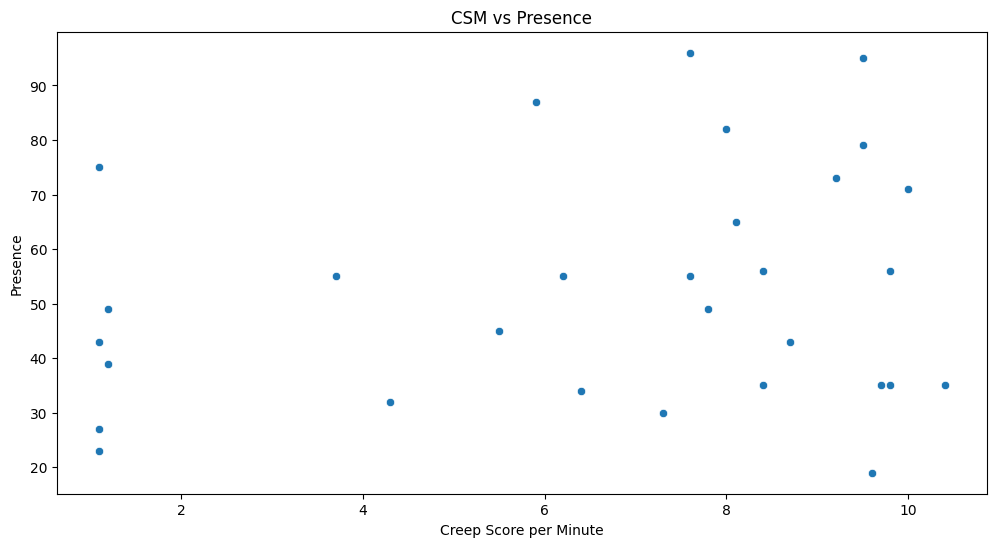

In [ ]:
#takes champions with at least 10 games and makes a scatterplot of CSM vs Presence
plt.figure(figsize=(12, 6))
play = champs[champs['Picks'] >= 10]
sns.scatterplot(data = play, x = 'CSM', y = 'Presence')
plt.title('CSM vs Presence')
plt.xlabel('Creep Score per Minute')
plt.ylabel('Presence')
plt.show()

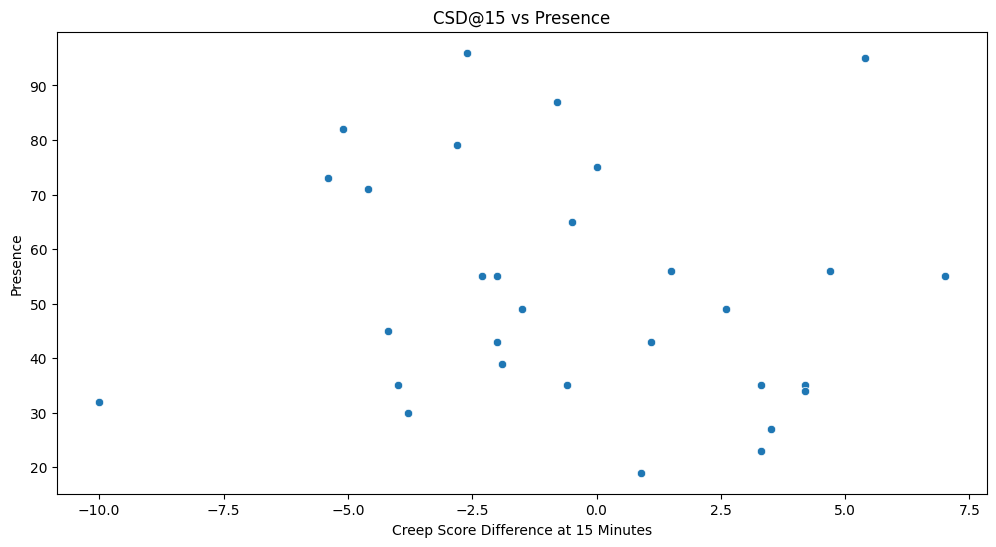

In [27]:
#takes champions with at least 10 games and makes a scatterplot of CSD@15 vs Presence
plt.figure(figsize=(12, 6))
play = champs[champs['Picks'] >= 10]
sns.scatterplot(data = play, x = 'CSD@15', y = 'Presence')
plt.title('CSD@15 vs Presence')
plt.xlabel('Creep Score Difference at 15 Minutes')
plt.ylabel('Presence')
plt.show()

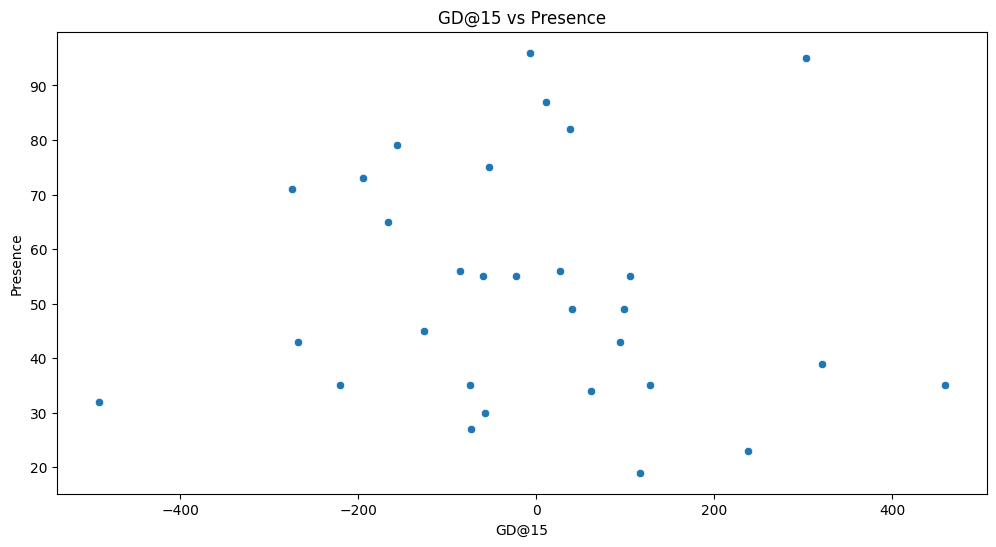

In [ ]:
#takes champions with at least 10 games and makes a scatterplot of GD@15 vs Presence
plt.figure(figsize=(12, 6))
play = champs[champs['Picks'] >= 10]
sns.scatterplot(data = play, x = 'GD@15', y = 'Presence')
plt.title('GD@15 vs Presence')
plt.xlabel('Gold Difference at 15 Minutes')
plt.ylabel('Presence')
plt.show()

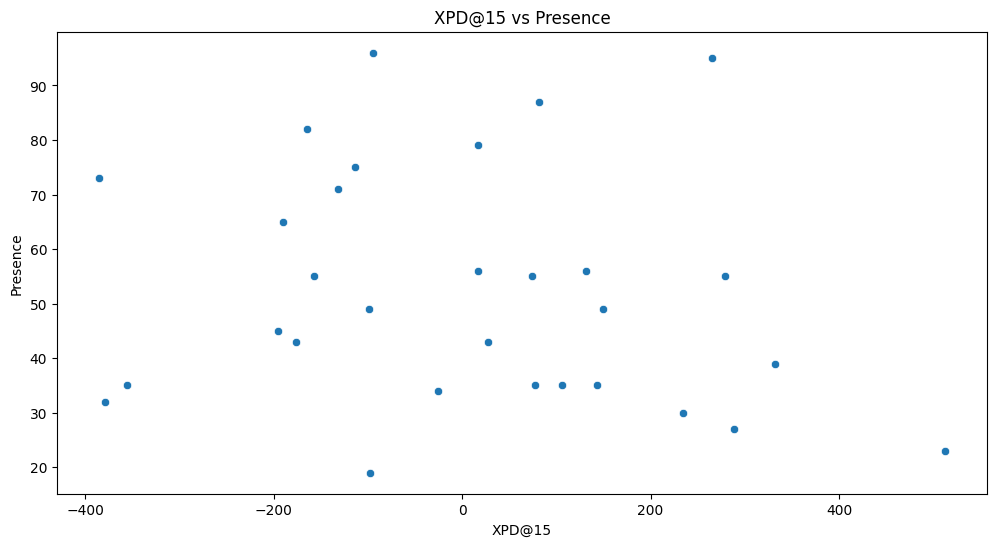

In [28]:
#takes champions with at least 10 games and makes a scatterplot of XPD@15 vs Presence
plt.figure(figsize=(12, 6))
play = champs[champs['Picks'] >= 10]
sns.scatterplot(data = play, x = 'XPD@15', y = 'Presence')
plt.title('XPD@15 vs Presence')
plt.xlabel('XP Difference at 15 Minutes')
plt.ylabel('Presence')
plt.show()

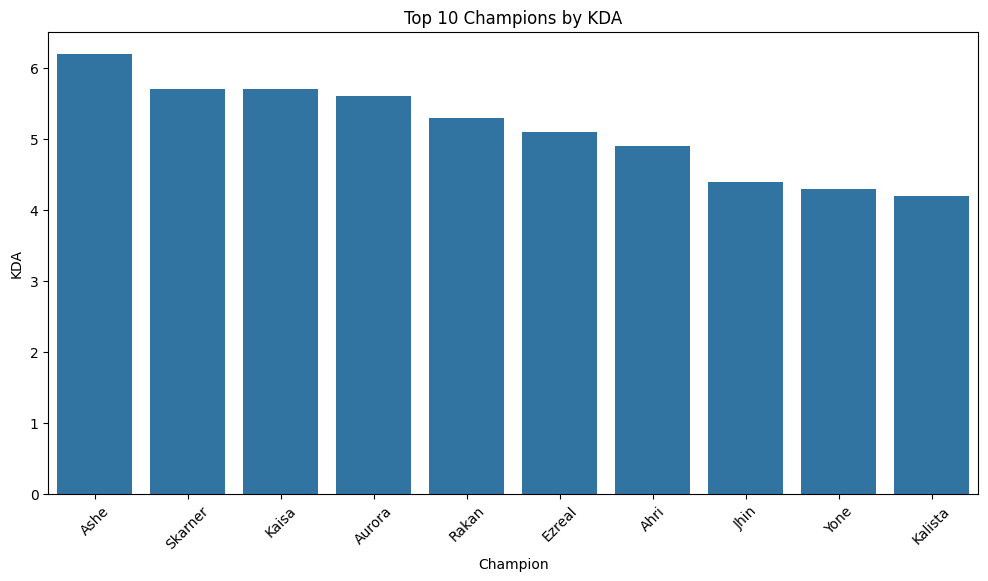

In [ ]:
#converts the KDA column to numbers, ignores numbers that don't work
champs['KDA'] = pd.to_numeric(champs['KDA'], errors='coerce')
#selects champions that are picked at least 10 times
play = champs[champs['Picks'] >= 10]
#sorts top KDA values and takes the top 10
top_kills = play.sort_values(by='KDA', ascending=False).head(10)

#creates a barplot of top KDAs and their champions
plt.figure(figsize=(12, 6))
sns.barplot(x='Champion', y='KDA', data=top_kills)
plt.title('Top 10 Champions by KDA')
plt.xlabel('Champion')
plt.ylabel('KDA')
plt.xticks(rotation=45)
plt.show()